In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import itertools
import gc
import os
import sys

sns.set_style('darkgrid')
sns.set_palette('bone')
pd.options.display.float_format = '{:,.3f}'.format

In [2]:
def toTapleList(list1,list2):
    return list(itertools.product(list1,list2))

Reduced Memory Usage:

Iterate Over every columns 

Determine if the columns in numeric 

Determine if the columns can be represented by an integer 

Find the min and max value 

Determine and apply the smallest datatype that can fit the range of values

Reduced Memory Usage:

Iterate Over every columns
Determine if the columns in numeric
Determine if the columns can be represented by an integer
Find the min and max value 
Determine and apply the smallest datatype that can fit the range of values

In [3]:
# Memory saving function credit to https://www.kaggle.com/gemartin/load-data-reduce-memory-usage
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.
    """
    start_mem = df.memory_usage().sum() / 1024**2
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                #if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                #    df[col] = df[col].astype(np.float16)
                #el
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        #else:
            #df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB --> {:.2f} MB (Decreased by {:.1f}%)'.format(
        start_mem, end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [2]:
train_df = pd.read_csv('train_V2.csv')

In [3]:
test_df = pd.read_csv('test_V2.csv')

In [6]:
train_df.shape

(8999, 29)

In [7]:
test_df.shape

(7505, 28)

In [8]:
train_df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.000,0,0,0,60,...,0,0.000,0,0.000,0,0,244.800,1,1466,0.444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.470,0,0,0,57,...,0,0.004,0,11.040,0,0,"1,434.000",5,0,0.640
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.000,0,0,0,47,...,0,0.000,0,0.000,0,0,161.800,2,0,0.775
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.900,0,0,0,75,...,0,0.000,0,0.000,0,0,202.700,3,0,0.167
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.000,0,0,0,45,...,0,0.000,0,0.000,0,0,49.750,2,0,0.188


In [9]:
train_df.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,"8,999.000","8,999.000","8,999.000","8,999.000","8,999.000","8,999.000","8,999.000","8,999.000","8,999.000","8,999.000",...,"8,999.000","8,999.000","8,999.000","8,999.000","8,999.000","8,999.000","8,999.000","8,999.000","8,999.000","8,999.000"
mean,0.228,1.129,130.226,0.652,0.226,1.375,47.901,507.422,0.922,0.540,...,0.162,611.111,0.003,4.335,0.026,0.008,"1,137.409",3.646,609.908,0.472
std,0.573,1.759,170.846,1.133,0.582,2.666,27.483,627.486,1.552,0.714,...,0.465,"1,509.556",0.058,29.667,0.175,0.091,"1,166.894",2.396,739.887,0.307
min,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.000,0.000,0.000,0.000,0.000,24.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,153.900,2.000,0.000,0.200
50%,0.000,0.000,80.340,0.000,0.000,0.000,48.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,678.100,3.000,0.000,0.458
75%,0.000,2.000,183.650,1.000,0.000,2.000,72.000,"1,172.000",1.000,1.000,...,0.000,0.015,0.000,0.000,0.000,0.000,"1,928.000",5.000,"1,495.000",0.741
max,6.000,11.000,"2,325.000",13.000,8.000,29.000,100.000,"2,026.000",21.000,5.000,...,6.000,"17,210.000",2.000,768.400,3.000,1.000,"9,325.000",43.000,"1,861.000",1.000


In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8999 entries, 0 to 8998
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               8999 non-null   object 
 1   groupId          8999 non-null   object 
 2   matchId          8999 non-null   object 
 3   assists          8999 non-null   int64  
 4   boosts           8999 non-null   int64  
 5   damageDealt      8999 non-null   float64
 6   DBNOs            8999 non-null   int64  
 7   headshotKills    8999 non-null   int64  
 8   heals            8999 non-null   int64  
 9   killPlace        8999 non-null   int64  
 10  killPoints       8999 non-null   int64  
 11  kills            8999 non-null   int64  
 12  killStreaks      8999 non-null   int64  
 13  longestKill      8999 non-null   float64
 14  matchDuration    8999 non-null   int64  
 15  matchType        8999 non-null   object 
 16  maxPlace         8999 non-null   int64  
 17  numGroups     

In [11]:
train_df.isnull().sum()/ train_df.shape[0] * 100

Id                0.000
groupId           0.000
matchId           0.000
assists           0.000
boosts            0.000
damageDealt       0.000
DBNOs             0.000
headshotKills     0.000
heals             0.000
killPlace         0.000
killPoints        0.000
kills             0.000
killStreaks       0.000
longestKill       0.000
matchDuration     0.000
matchType         0.000
maxPlace          0.000
numGroups         0.000
rankPoints        0.000
revives           0.000
rideDistance      0.000
roadKills         0.000
swimDistance      0.000
teamKills         0.000
vehicleDestroys   0.000
walkDistance      0.000
weaponsAcquired   0.000
winPoints         0.000
winPlacePerc      0.000
dtype: float64

In [12]:
for x in train_df.columns:
    print(x , ':', len(train_df[x].unique()))

Id : 8999
groupId : 8972
matchId : 8243
assists : 7
boosts : 12
damageDealt : 3836
DBNOs : 12
headshotKills : 8
heals : 28
killPlace : 100
killPoints : 759
kills : 18
killStreaks : 6
longestKill : 3258
matchDuration : 796
matchType : 15
maxPlace : 79
numGroups : 84
rankPoints : 532
revives : 7
rideDistance : 2051
roadKills : 3
swimDistance : 538
teamKills : 4
vehicleDestroys : 2
walkDistance : 6223
weaponsAcquired : 21
winPoints : 340
winPlacePerc : 977


array([[<AxesSubplot:title={'center':'assists'}>,
        <AxesSubplot:title={'center':'boosts'}>,
        <AxesSubplot:title={'center':'damageDealt'}>,
        <AxesSubplot:title={'center':'DBNOs'}>,
        <AxesSubplot:title={'center':'headshotKills'}>],
       [<AxesSubplot:title={'center':'heals'}>,
        <AxesSubplot:title={'center':'killPlace'}>,
        <AxesSubplot:title={'center':'killPoints'}>,
        <AxesSubplot:title={'center':'kills'}>,
        <AxesSubplot:title={'center':'killStreaks'}>],
       [<AxesSubplot:title={'center':'longestKill'}>,
        <AxesSubplot:title={'center':'matchDuration'}>,
        <AxesSubplot:title={'center':'maxPlace'}>,
        <AxesSubplot:title={'center':'numGroups'}>,
        <AxesSubplot:title={'center':'rankPoints'}>],
       [<AxesSubplot:title={'center':'revives'}>,
        <AxesSubplot:title={'center':'rideDistance'}>,
        <AxesSubplot:title={'center':'roadKills'}>,
        <AxesSubplot:title={'center':'swimDistance'}>,
       

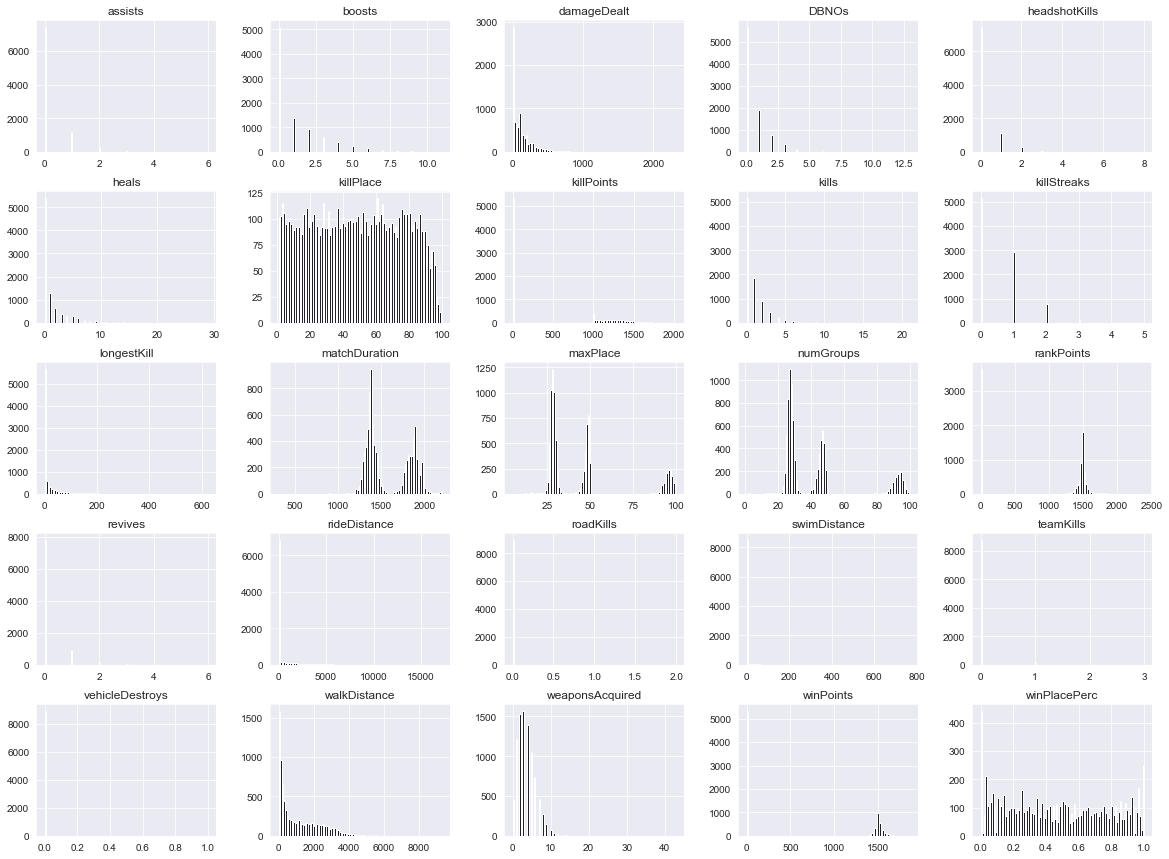

In [13]:
# PCA Histogram only take float and Integer numbers
train_df.select_dtypes(include=['float64','int64']).hist(bins=100, figsize=(20,15))

In [14]:
ds = train_df.isin([np.inf, -np.inf]).sum()/train_df.shape[0]*100
print(ds)

Id                0.000
groupId           0.000
matchId           0.000
assists           0.000
boosts            0.000
damageDealt       0.000
DBNOs             0.000
headshotKills     0.000
heals             0.000
killPlace         0.000
killPoints        0.000
kills             0.000
killStreaks       0.000
longestKill       0.000
matchDuration     0.000
matchType         0.000
maxPlace          0.000
numGroups         0.000
rankPoints        0.000
revives           0.000
rideDistance      0.000
roadKills         0.000
swimDistance      0.000
teamKills         0.000
vehicleDestroys   0.000
walkDistance      0.000
weaponsAcquired   0.000
winPoints         0.000
winPlacePerc      0.000
dtype: float64


In [15]:
train_df.select_dtypes(include='number').columns

Index(['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill',
       'matchDuration', 'maxPlace', 'numGroups', 'rankPoints', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'winPlacePerc'],
      dtype='object')

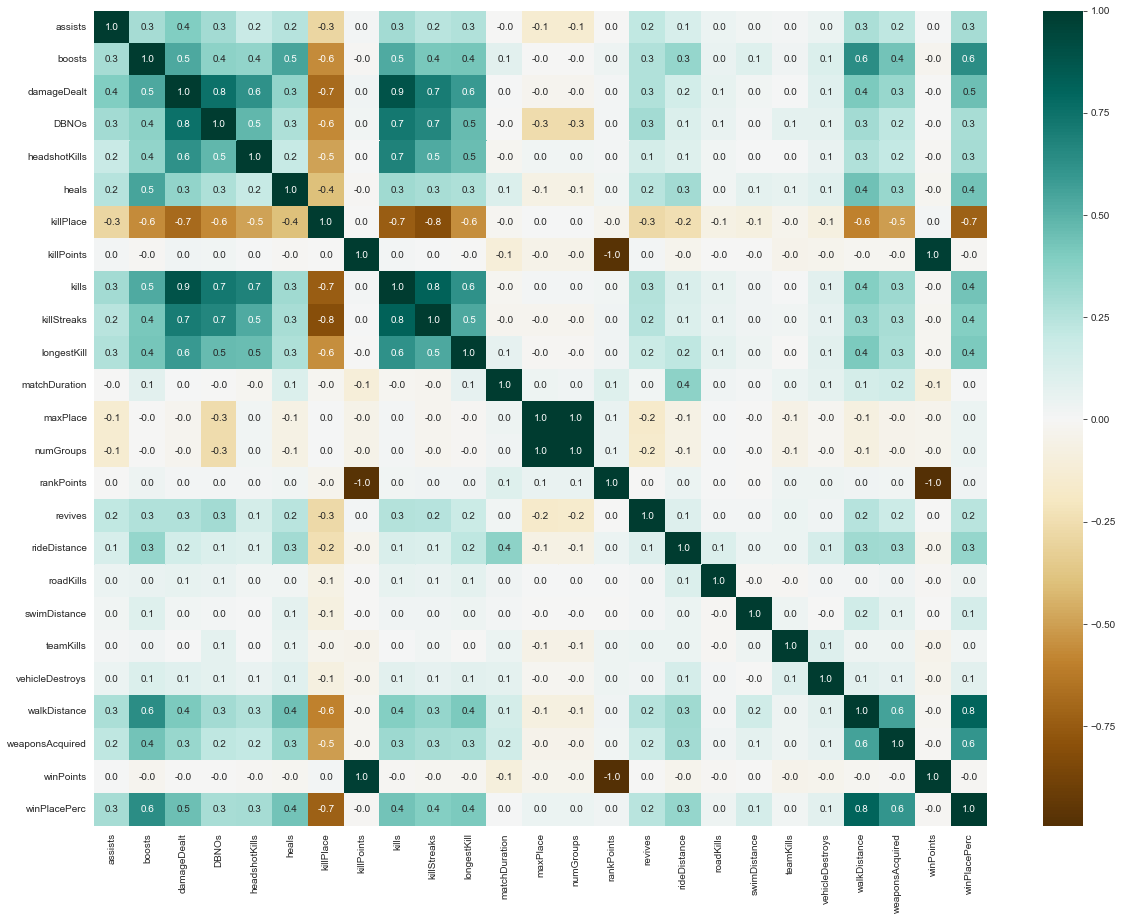

In [16]:
corr = train_df.corr()
f,ax = plt.subplots(figsize=(20,15))
sns.heatmap(train_df.corr(), annot=True, fmt= '.1f',ax=ax, cmap="BrBG")
sns.set(font_scale=1.25)
plt.show()

C:\Users\zi1154\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


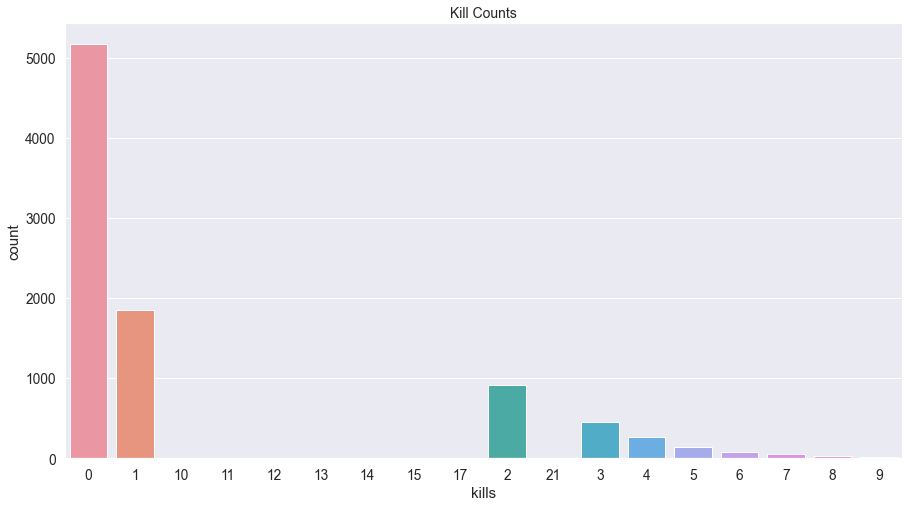

In [17]:
data = train_df.copy()
data.loc[data['kills'] > data['kills'].quantile(0.99)]
plt.figure(figsize=(15,8))
sns.countplot(data['kills'].astype('str').sort_values())
plt.title("Kill Counts",fontsize=14)
plt.show()

C:\Users\zi1154\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


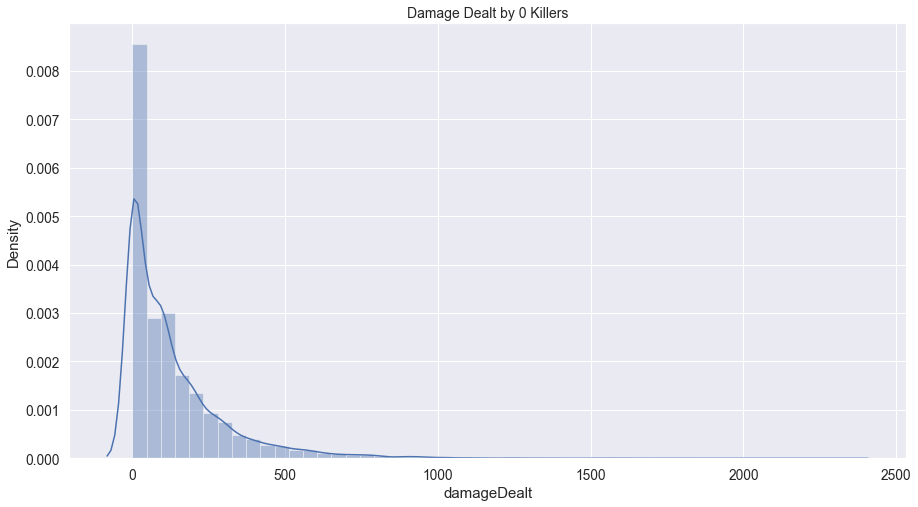

In [18]:
data.loc[data['kills']==0]
plt.figure(figsize=(15,8))
plt.title("Damage Dealt by 0 Killers",fontsize=14)
sns.distplot(data['damageDealt'])
plt.show()

In [44]:
print("A total of {} players({:.4f}%) have won witout a single kill".format(len(data[data['winPlacePerc']==1]), 100*len(data[data['winPlacePerc']==1])/len(train_df)))
data1 = train_df[train_df['damageDealt']==0].copy()
print("A total of {} players({:.4f}%) have won witout Dealing Damage".format(len(data1[data1['winPlacePerc']==1]), 100*len(data1[data1['winPlacePerc']==1])/len(train_df)))

A total of 250 players(2.7781%) have won witout a single kill
A total of 10 players(0.1111%) have won witout Dealing Damage


In [45]:
data1['damageDealt'].value_counts()

0.000    2531
Name: damageDealt, dtype: int64

In [46]:
test = data1['winPlacePerc']==1

In [47]:
test.sum()/ train_df.shape[0]*100

0.11112345816201799

In [63]:
#Players who did not walk above 0 kilomerter
test2 = (data['walkDistance']==0)
test2.sum()/train_df.shape[0]*100

2.1780197799755525

In [66]:
test2.value_counts()

False    8803
True      196
Name: walkDistance, dtype: int64

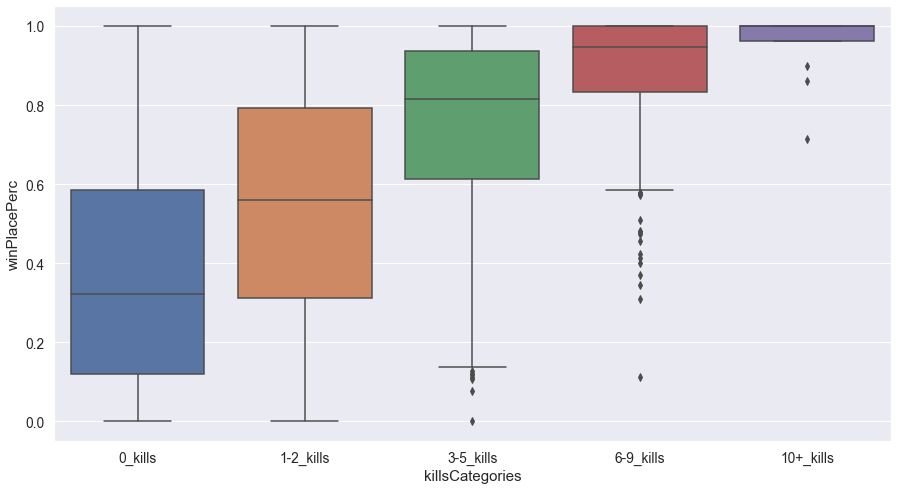

In [65]:
kills = train_df.copy()
kills['killsCategories'] = pd.cut(kills['kills'], [-1,0,2,5,10,60], labels=['0_kills','1-2_kills','3-5_kills','6-9_kills','10+_kills'])
plt.figure(figsize=(15,8))
sns.boxplot(x='killsCategories', y='winPlacePerc', data=kills)
plt.show()

<Figure size 1080x720 with 0 Axes>

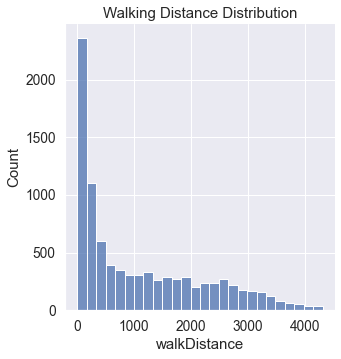

In [70]:
data2 = data[data['walkDistance']< train_df['walkDistance'].quantile(0.99)]
plt.figure(figsize=(15,10))
sns.displot(data2['walkDistance'])
plt.title('Walking Distance Distribution',fontsize=15)
plt.show()

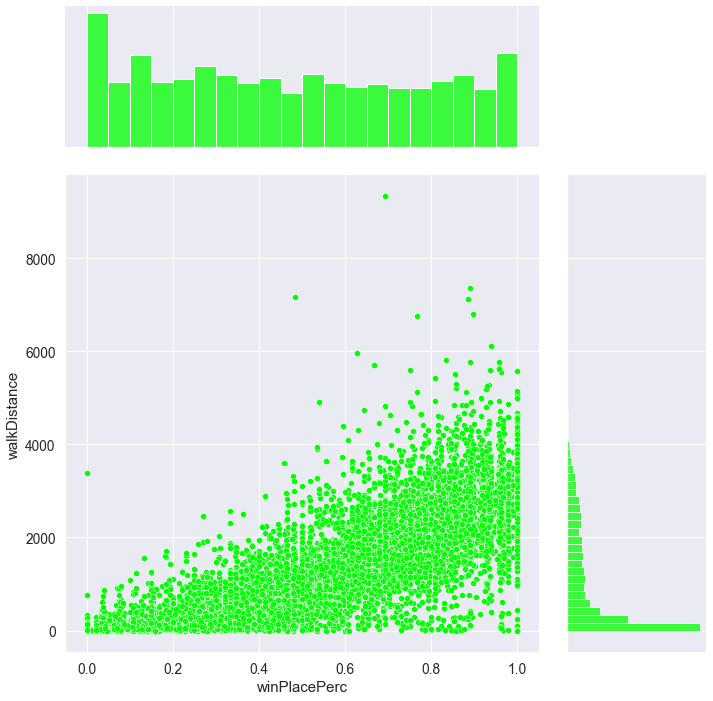

In [17]:
#The scatter plot below indicates there is a high correlation between running and winning percentage.
#This isn't something new since the longer you're alive, the more you run and more is the change of winning 
sns.jointplot(x='winPlacePerc', y='walkDistance', data=train_df, height=10, ratio=3, color='lime')
plt.show()

In [20]:
data2 = train_df['rideDistance']

In [23]:
print("An average person drives for {:.1f}m, ({:.1f}%)".format(train_df['rideDistance'].mean(), data2.sum()/train_df.shape[0]*100
))

An average person drives for 611.1m, (61111.1%)


In [ ]:
sns.jointplot(x='winPlacePerc', y='rideDistance', data=train_df, height=10, ratio=3, color='y')
plt.show()

In [ ]:
f,ax1 = plt.subplots(figsize=(15,8))
sns.pointplot(x='vehicleDestroys', y='winPlacePerc', data=train_df, color='lime', alpha=0.5)
plt.title('Vehicle Destroyed/Win Ratio', fontsize=20, color='blue')
plt.xlabel('Count of Vehicle Destroys', fontsize=16, color='blue')
plt.ylabel('Win Percentage', fontsize=16, color='blue')
plt.grid()
plt.show()

In [22]:
# Since we are merging train and test dataset we reseting index to default 
all_data = train_df.append(test_df, sort=False).reset_index(drop=True)

In [23]:
all_data['totalDistance'] = all_data['rideDistance'] + all_data['walkDistance'] + all_data['swimDistance']
all_data['healthItems'] = all_data['heals'] + all_data['boosts']
all_data['headshotKillRate'] = all_data['headshotKills'] / all_data['kills']
all_data['killPlaceOverMaxPlace'] = all_data['killPlace'] / all_data['maxPlace']
all_data['killsOverWalkDistance'] = all_data['kills'] / all_data['walkDistance']

In [35]:
ds = all_data.isin([np.inf, -np.inf]).sum()/all_data.shape[0]*100
print(ds)

Id                       0.000000
groupId                  0.000000
matchId                  0.000000
assists                  0.000000
boosts                   0.000000
damageDealt              0.000000
DBNOs                    0.000000
headshotKills            0.000000
heals                    0.000000
killPlace                0.000000
killPoints               0.000000
kills                    0.000000
killStreaks              0.000000
longestKill              0.000000
matchDuration            0.000000
matchType                0.000000
maxPlace                 0.000000
numGroups                0.000000
rankPoints               0.000000
revives                  0.000000
rideDistance             0.000000
roadKills                0.000000
swimDistance             0.000000
teamKills                0.000000
vehicleDestroys          0.000000
walkDistance             0.000000
weaponsAcquired          0.000000
winPoints                0.000000
winPlacePerc             0.000000
 Id           

In [36]:
def fillInf(all_data, val):
    numcols = all_data.select_dtypes(include='number').columns
    cols = numcols[numcols != 'winPlacePerc']
    all_data[all_data == np.Inf] = np.NaN
    all_data[all_data == np.NINF] = np.NaN
    for c in cols: all_data[c].fillna(val, inplace=True)

In [37]:
fillInf(all_data, 0)

In [38]:
ds1 = all_data.isin([np.inf, -np.inf]).sum()/all_data.shape[0]*100
print(ds1)

Id                       0.0
groupId                  0.0
matchId                  0.0
assists                  0.0
boosts                   0.0
damageDealt              0.0
DBNOs                    0.0
headshotKills            0.0
heals                    0.0
killPlace                0.0
killPoints               0.0
kills                    0.0
killStreaks              0.0
longestKill              0.0
matchDuration            0.0
matchType                0.0
maxPlace                 0.0
numGroups                0.0
rankPoints               0.0
revives                  0.0
rideDistance             0.0
roadKills                0.0
swimDistance             0.0
teamKills                0.0
vehicleDestroys          0.0
walkDistance             0.0
weaponsAcquired          0.0
winPoints                0.0
winPlacePerc             0.0
 Id                      0.0
totalDistance            0.0
healthItems              0.0
headshotKillRate         0.0
killPlaceOverMaxPlace    0.0
killsOverWalkD

array([[<AxesSubplot:title={'center':'assists'}>,
        <AxesSubplot:title={'center':'boosts'}>,
        <AxesSubplot:title={'center':'damageDealt'}>,
        <AxesSubplot:title={'center':'DBNOs'}>,
        <AxesSubplot:title={'center':'headshotKills'}>],
       [<AxesSubplot:title={'center':'heals'}>,
        <AxesSubplot:title={'center':'killPlace'}>,
        <AxesSubplot:title={'center':'killPoints'}>,
        <AxesSubplot:title={'center':'kills'}>,
        <AxesSubplot:title={'center':'killStreaks'}>],
       [<AxesSubplot:title={'center':'longestKill'}>,
        <AxesSubplot:title={'center':'matchDuration'}>,
        <AxesSubplot:title={'center':'maxPlace'}>,
        <AxesSubplot:title={'center':'numGroups'}>,
        <AxesSubplot:title={'center':'rankPoints'}>],
       [<AxesSubplot:title={'center':'revives'}>,
        <AxesSubplot:title={'center':'rideDistance'}>,
        <AxesSubplot:title={'center':'roadKills'}>,
        <AxesSubplot:title={'center':'swimDistance'}>,
       

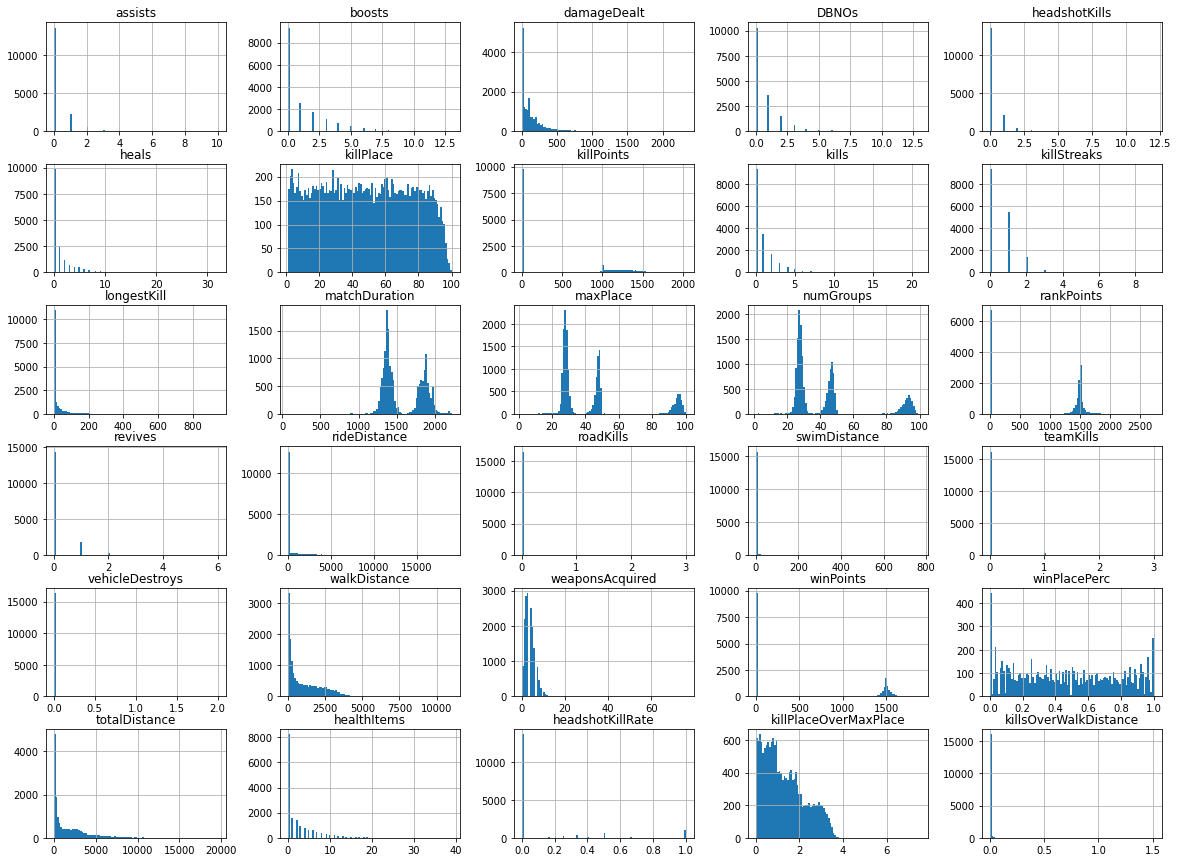

In [39]:
all_data.select_dtypes(include=['float64','int64']).hist(bins=100, figsize=(20,15))

In [47]:
featureImp = all_data.select_dtypes(include=['float64','int64'])

In [76]:
featureImp['winPlacePerc'].fillna(0)

0        0.4444
1        0.6400
2        0.7755
3        0.1667
4        0.1875
          ...  
16499    0.0000
16500    0.0000
16501    0.0000
16502    0.0000
16503    0.0000
Name: winPlacePerc, Length: 16504, dtype: float64

In [77]:
featureImp.isna().sum()/ train_df.shape[0] * 100

assists                  0.0
boosts                   0.0
damageDealt              0.0
DBNOs                    0.0
headshotKills            0.0
heals                    0.0
killPlace                0.0
killPoints               0.0
kills                    0.0
killStreaks              0.0
longestKill              0.0
matchDuration            0.0
maxPlace                 0.0
numGroups                0.0
rankPoints               0.0
revives                  0.0
rideDistance             0.0
roadKills                0.0
swimDistance             0.0
teamKills                0.0
vehicleDestroys          0.0
walkDistance             0.0
weaponsAcquired          0.0
winPoints                0.0
winPlacePerc             0.0
totalDistance            0.0
healthItems              0.0
headshotKillRate         0.0
killPlaceOverMaxPlace    0.0
killsOverWalkDistance    0.0
dtype: float64

In [78]:
X = featureImp.drop('winPlacePerc', axis='columns')
y = featureImp['winPlacePerc']

In [79]:
y

0        0.4444
1        0.6400
2        0.7755
3        0.1667
4        0.1875
          ...  
16499    0.0000
16500    0.0000
16501    0.0000
16502    0.0000
16503    0.0000
Name: winPlacePerc, Length: 16504, dtype: float64

In [80]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [81]:
x_test.shape

(3301, 29)

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

Feature: 0, Score: 0.00635
Feature: 1, Score: 35983595.72777
Feature: 2, Score: 0.00002
Feature: 3, Score: -0.00945
Feature: 4, Score: 0.02276
Feature: 5, Score: 35983595.71523
Feature: 6, Score: -0.00334
Feature: 7, Score: -0.00005
Feature: 8, Score: -0.00425
Feature: 9, Score: -0.06478
Feature: 10, Score: -0.00015
Feature: 11, Score: -0.00008
Feature: 12, Score: -0.00798
Feature: 13, Score: 0.00839
Feature: 14, Score: 0.00005
Feature: 15, Score: 0.00372
Feature: 16, Score: 1069880915.61415
Feature: 17, Score: -0.04392
Feature: 18, Score: 1069880915.61401
Feature: 19, Score: 0.01326
Feature: 20, Score: 0.03070
Feature: 21, Score: 1069880915.61420
Feature: 22, Score: 0.00933
Feature: 23, Score: 0.00009
Feature: 24, Score: -1069880915.61414
Feature: 25, Score: -35983595.71639
Feature: 26, Score: -0.05270
Feature: 27, Score: -0.01687
Feature: 28, Score: -0.70058


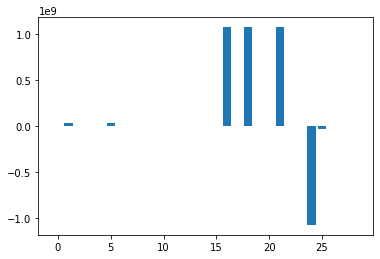

In [84]:
model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()